# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# 1. Load Data
Loading and immediately shuffeling Data frame.
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [129]:
# Prediction Model developed by:
# Khurram Nazir
#  
#
import pandas as pd
import numpy as np
import seaborn as sns
#

import io
from google.colab import files

uploaded_file = files.upload()
#df = pd.read_csv("C:\Users\khurr\Documents\GitHub\AI-Engineering\PIAIC\Quarter-2\DeepLearning\compresive_strength_concrete.csv",sep=',')
df = pd.DataFrame(pd.read_csv(io.BytesIO(uploaded_file['compresive_strength_concrete.csv']),sep=','))

Saving compresive_strength_concrete.csv to compresive_strength_concrete (6).csv


In [130]:
df = df.sample(frac=1) #Shuffeling DF.
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
856,356.0,0.0,142.0,193.0,11.0,801.0,778.0,28,40.87
217,190.3,0.0,125.2,161.9,9.9,1088.1,802.6,56,38.56
12,427.5,47.5,0.0,228.0,0.0,932.0,594.0,270,43.01
268,212.0,0.0,124.8,159.0,7.8,1085.4,799.5,100,47.82
657,108.3,162.4,0.0,203.5,0.0,938.2,849.0,28,20.59
...,...,...,...,...,...,...,...,...,...
611,277.0,0.0,0.0,191.0,0.0,968.0,856.0,14,21.26
392,333.0,17.5,163.0,167.0,17.9,996.0,652.0,28,47.28
575,238.1,0.0,0.0,185.7,0.0,1118.8,789.3,28,17.58
84,323.7,282.8,0.0,183.8,10.3,942.7,659.9,3,28.30


In [131]:
def df_lookslike(v_df):
    #---------------------------------------How dataframe looks like?
    v_df.info()
    print(v_df.head(5))
    total_cells=np.product(v_df.shape)
    num_col = [i for i in v_df.columns if (v_df[i].dtype=='int64' or v_df[i].dtype=='float64')]
    print(v_df[num_col].describe().loc[['min','max', 'mean','50%'],:]) #How big is Messy data?
    missing_Values=v_df.isnull().sum()
    print(missing_Values)
    total_missing=missing_Values.sum()

    #Percent of Missing data
    print("Percent of data is missing:",((total_missing/total_cells) * 100))
   

# 2. Check Missing Values
( If Exist ; Fill each record with mean of its feature )

I found there is NO missing/NULL data.

In [132]:
df_lookslike(df)# How DF looks like?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1030 entries, 856 to 503
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals) 

**Preparing Tensor & Feature Engineering**

We have all data in Float and Int form. There is no character data.
Hence No need to perform OneHotEncoding.

In [133]:
#Lets assign alias to columns.
df2 = df.set_axis(['Cement', 'Bl_F_Slag', 'Fly_Ash', 'Water', 'S_plast','Coarse_Agg','Fine_Agg','Age_day','Concrete_target'], axis=1, inplace=False)
df2

,Cement,Bl_F_Slag,Fly_Ash,Water,S_plast,Coarse_Agg,Fine_Agg,Age_day,Concrete_target
856,356.0,0.0,142.0,193.0,11.0,801.0,778.0,28,40.87
217,190.3,0.0,125.2,161.9,9.9,1088.1,802.6,56,38.56
12,427.5,47.5,0.0,228.0,0.0,932.0,594.0,270,43.01
268,212.0,0.0,124.8,159.0,7.8,1085.4,799.5,100,47.82
657,108.3,162.4,0.0,203.5,0.0,938.2,849.0,28,20.59
...,...,...,...,...,...,...,...,...,...
611,277.0,0.0,0.0,191.0,0.0,968.0,856.0,14,21.26
392,333.0,17.5,163.0,167.0,17.9,996.0,652.0,28,47.28
575,238.1,0.0,0.0,185.7,0.0,1118.8,789.3,28,17.58
84,323.7,282.8,0.0,183.8,10.3,942.7,659.9,3,28.30


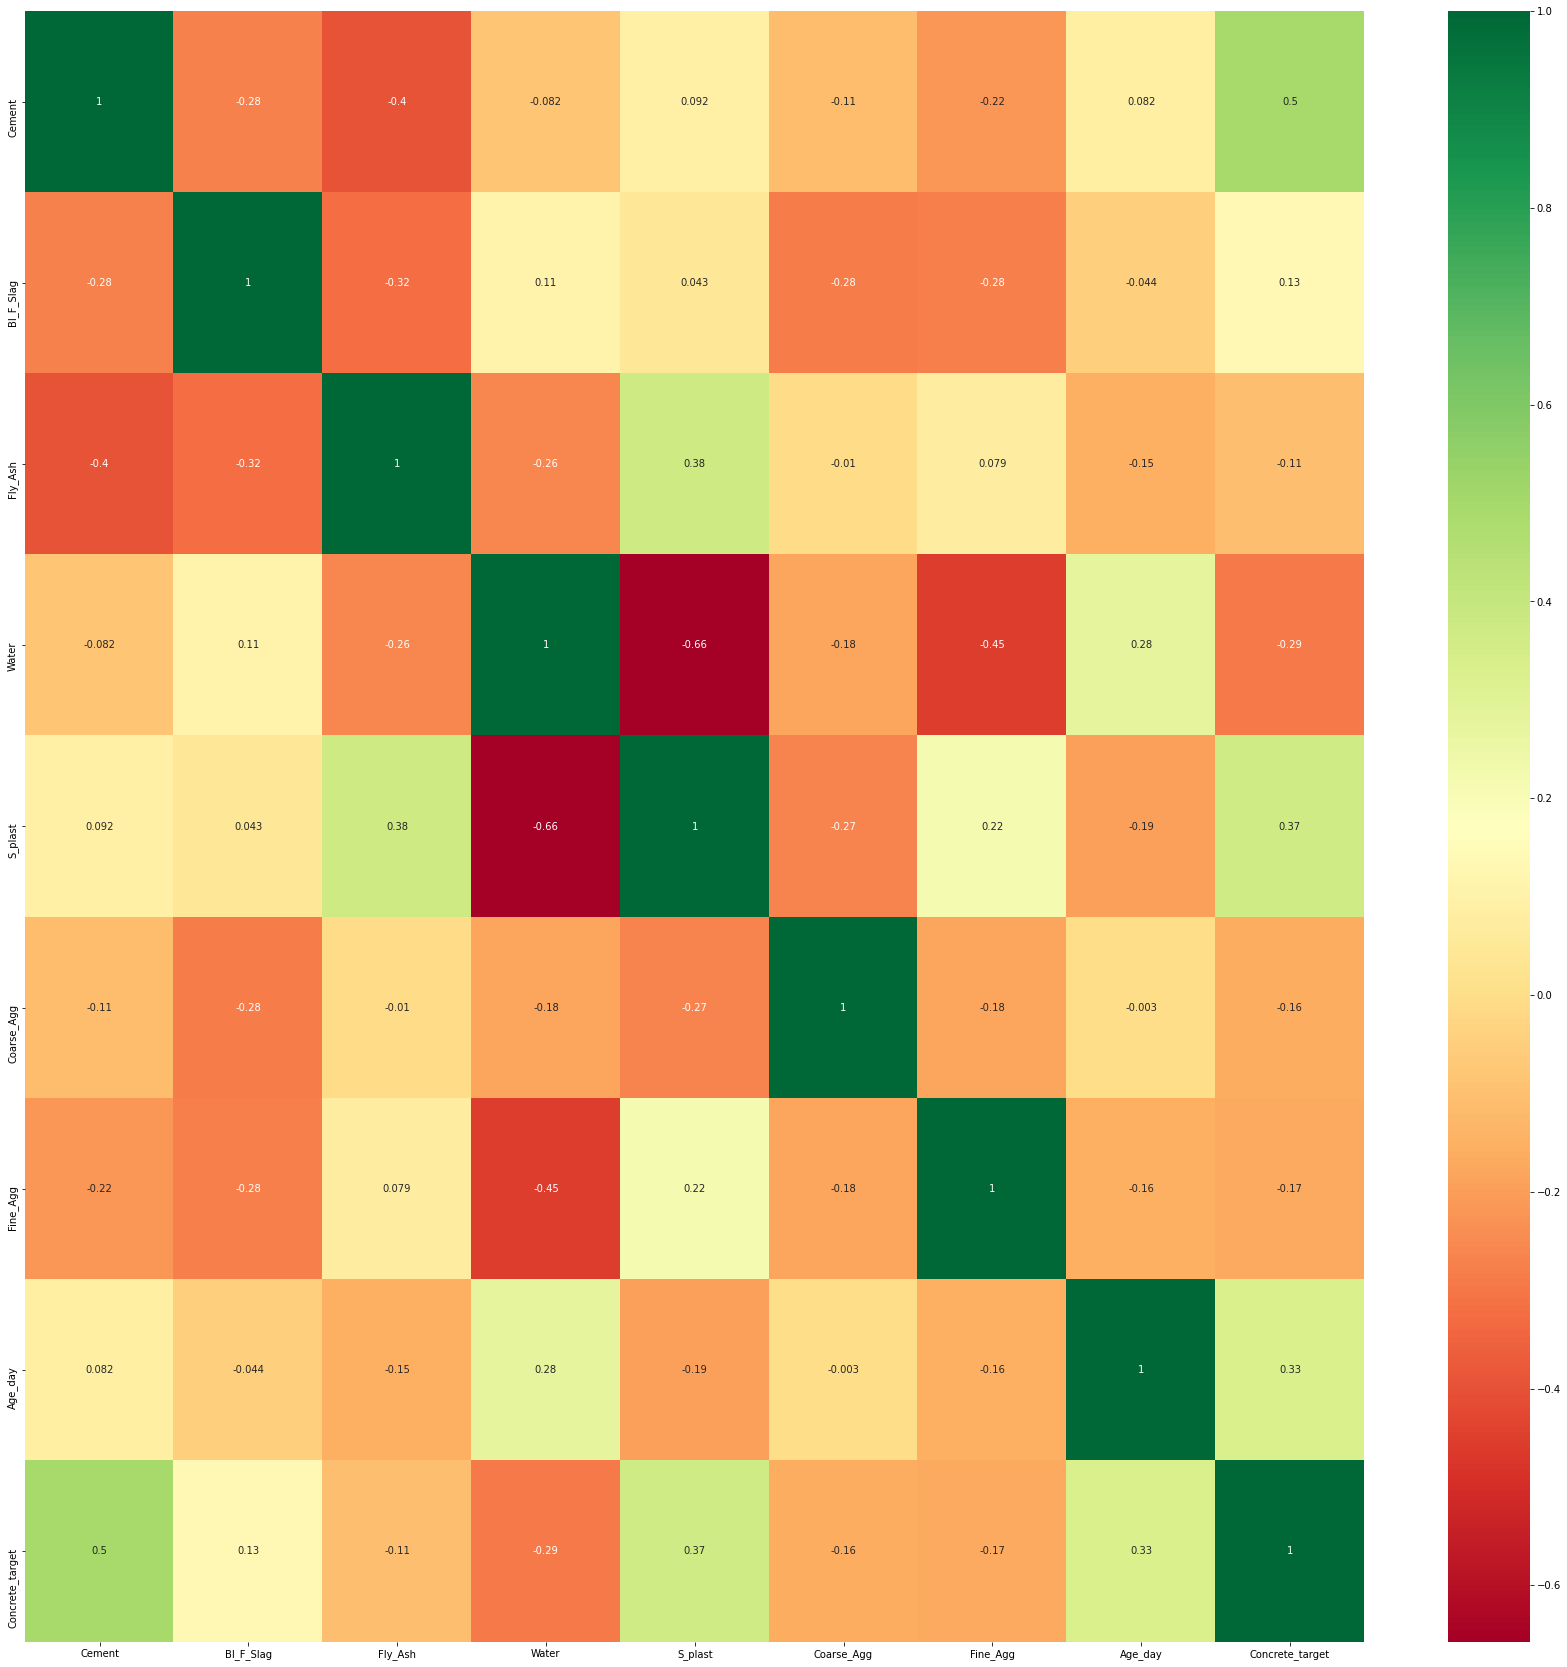

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

corrmat = df2.corr(method='pearson',min_periods=5) #pearson : standard correlation coefficient,
top_corr_features = corrmat.index
plt.figure(figsize=(30,30))
g=sns.heatmap(df2[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [135]:
df2.head()

,Cement,Bl_F_Slag,Fly_Ash,Water,S_plast,Coarse_Agg,Fine_Agg,Age_day,Concrete_target
856,356.0,0.0,142.0,193.0,11.0,801.0,778.0,28,40.87
217,190.3,0.0,125.2,161.9,9.9,1088.1,802.6,56,38.56
12,427.5,47.5,0.0,228.0,0.0,932.0,594.0,270,43.01
268,212.0,0.0,124.8,159.0,7.8,1085.4,799.5,100,47.82
657,108.3,162.4,0.0,203.5,0.0,938.2,849.0,28,20.59


In [136]:
blast_mean = np.mean(df2.Bl_F_Slag)
fly_mean = np.mean(df2.Fly_Ash)
superplastic_mean = np.mean(df2.S_plast)


In [137]:
df2.Bl_F_Slag=df2.Bl_F_Slag.mask(df2.Bl_F_Slag==0).fillna(blast_mean)
df2.Fly_Ash=df2.Fly_Ash.mask(df2.Fly_Ash==0).fillna(fly_mean)
df2.S_plast=df2.S_plast.mask(df2.S_plast==0).fillna(superplastic_mean)
#
df2

,Cement,Bl_F_Slag,Fly_Ash,Water,S_plast,Coarse_Agg,Fine_Agg,Age_day,Concrete_target
856,356.0,73.895825,142.00000,193.0,11.00000,801.0,778.0,28,40.87
217,190.3,73.895825,125.20000,161.9,9.90000,1088.1,802.6,56,38.56
12,427.5,47.500000,54.18835,228.0,6.20466,932.0,594.0,270,43.01
268,212.0,73.895825,124.80000,159.0,7.80000,1085.4,799.5,100,47.82
657,108.3,162.400000,54.18835,203.5,6.20466,938.2,849.0,28,20.59
...,...,...,...,...,...,...,...,...,...
611,277.0,73.895825,54.18835,191.0,6.20466,968.0,856.0,14,21.26
392,333.0,17.500000,163.00000,167.0,17.90000,996.0,652.0,28,47.28
575,238.1,73.895825,54.18835,185.7,6.20466,1118.8,789.3,28,17.58
84,323.7,282.800000,54.18835,183.8,10.30000,942.7,659.9,3,28.30


In [138]:

Y=(df2.loc[:,df2.columns=='Concrete_target']) #Lets take Dependent Variable/Target in a serpate df i.e X.
X=(df2.loc[:,df2.columns!='Concrete_target']) #Lets take Independent Variables in a serpate df i.e Y.

In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)#70%-30%
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2) #80%-20%

In [140]:
#from sklearn.preprocessing import StandardScaler
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

X_train -= mean
X_train /= std
#
X_test -= mean
X_test /= std
#
X_val -= mean
X_val /= std

In [141]:
X_train.head()

,Cement,Bl_F_Slag,Fly_Ash,Water,S_plast,Coarse_Agg,Fine_Agg,Age_day
607,-0.375522,-0.567853,-0.763959,0.610955,-0.574319,-0.055622,1.341109,-0.295453
83,0.840941,1.327398,-0.763959,-0.757356,0.751334,-0.350749,-0.265085,-0.701302
679,-0.606132,0.541992,-0.763959,1.057654,-0.574319,0.012776,-0.337190,-0.295453
972,-1.243190,1.057364,-0.763959,0.042001,-1.263434,0.169840,0.493257,-0.295453
62,0.335523,-0.567853,-0.763959,0.516913,-0.574319,-0.017623,0.913453,-0.701302


In [142]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
network = Sequential()

network.add(layers.Dense(6, activation='relu', input_shape=(X_train.shape[1],)))
network.add(layers.Dense(4, activation='relu'))
network.add(layers.Dense(1))

In [143]:
network.compile(optimizer='adam', loss='mse', metrics='mae')

In [144]:
history = network.fit(X_train, Y_train, batch_size=30, verbose=0, epochs=200, validation_data=(X_val, Y_val))

In [145]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, 201)
print('Training Loss\t:' + str(train_loss[-1]))
print('Validation Loss\t:' + str(val_loss[-1]))

Training Loss	:53.6463508605957
Validation Loss	:64.40811920166016


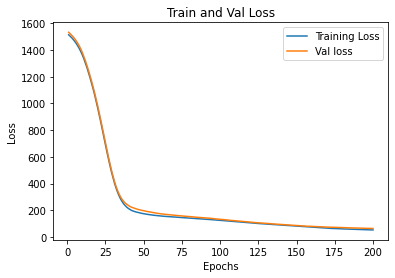

In [146]:
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Val loss')
plt.title('Train and Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [147]:
mae_train = history.history['mae']
mae_val= history.history['val_mae']
print('Training Loss:\t\t' + str(mae_train[-1]))
print('Validation Loss:\t' + str(mae_val[-1]))

Training Loss:		5.61079216003418
Validation Loss:	6.28650426864624


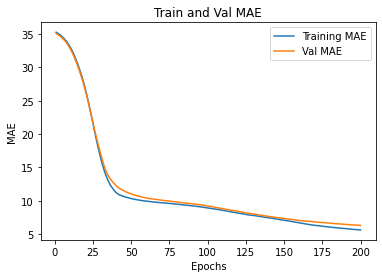

In [148]:
plt.plot(epochs, mae_train, label='Training MAE')
plt.plot(epochs, mae_val, label='Val MAE')
plt.title('Train and Val MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [164]:
pred = network.predict(X_test)
print(pred.shape)
pred=pred.reshape(309)


(309, 1)


In [165]:
Result = pd.DataFrame({'Actual': [Y_test]})
Result

,Actual
0,Concrete_target 219 10.76 910 ...
